# **Лабораторна робота №3**
# **МІТ-31**
# **Ковальський Олександр**

In [ ]:
import numpy as np
import matplotlib as plt
import sklearn.model_selection
import sklearn.metrics as mt
import sklearn.datasets
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression






#1. Створити набір даних за допомогою DatasetGenerator
#2. Завантажити набір даних для класифікації на сайті (у кожного студента має бути інший - прошу організуватись відповідним чином)



In [ ]:
X, y = sklearn.datasets.make_classification(n_samples=1024, n_features=20, class_sep=0.98, random_state=0)
model1 = (sklearn.model_selection.train_test_split(X, y, test_size=0.5, random_state=0),) # x_train, x_test, y_train, y_test

model2 = pd.DataFrame(data={'X':[np.random.uniform(-4.0, 4.0) for i in range(1000)],'Y':[np.random.uniform(-300.0, 300.0) for i in range(1000)],'Z':['90.0' for i in range(1000)]})

model3 = pd.read_csv("./celestialBodies.csv")
df = model3
data = df

In [ ]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


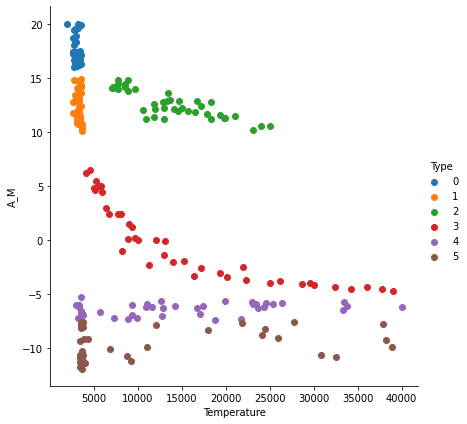

In [ ]:
sns.FacetGrid(df, hue="Type", size=6) \
   .map(plt.pyplot.scatter, "Temperature", "A_M") \
   .add_legend()

plt.pyplot.show()

#3. (опціонально для отримання відмінної оцінки) Згенерувати набір даних для класифікації на основі звичайних можливостей Python.



In [ ]:
features = list(data.columns[0:4])          
target = data.columns[4]                      

print('Features:',features)
print('Target:',target)

X = data.iloc[:,0:4]
y = data.iloc[:,4]

print(y.shape)
print(X.shape)

Features: ['Temperature', 'L', 'R', 'A_M']
Target: Color
(240,)
(240, 4)


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)

data['EncodedType'] = y

print('Classes:',le.classes_)
print('Response variable after encoding:',y)
data.tail(10)

Classes: ['Blue' 'Blue White' 'Blue white' 'Blue-White' 'Blue-white' 'Orange'
 'Orange-Red' 'Pale yellow orange' 'Red' 'White' 'White-Yellow' 'Whitish'
 'Yellowish' 'Yellowish White' 'white' 'yellow-white' 'yellowish']
Response variable after encoding: [ 8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  1  9  9  9
  1 13  2 13 13  7  0  4  4 11 15 11 15 15 15 15  8  8  8  8  8  8  8  8
  8  0  8  8  8  5  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8 10  9 14  1  1  1  1  1 14  0 15 16 16 12  4  4
  6 15  4  0  0  0  0  0  0  0  0  0  0  0  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  1  0  0  1
  2  2  2 14  9  1  4  3  4  4  4  4  4  4  4  0  0  0  0  0  0  0  0  0
  0  0  8  8  5  0  8  8  0  4  4  4  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  0  0  0  0  0  0  0  0  0  0  4  4  4  4  0  0
  4  4  4 15  0  0  0  0  0  0  0  0  0  0  4  0  0  4  4  0  0  9  9  0]


,Temperature,L,R,A_M,Color,Spectral_Class,Type,EncodedType
230,24145,382993.0,1494.0,-8.84,Blue-white,B,5,4
231,38234,272830.0,1356.0,-9.29,Blue,O,5,0
232,32489,648430.0,1948.5,-10.84,Blue,O,5,0
233,27739,849420.0,1252.0,-7.59,Blue-white,B,5,4
234,21904,748490.0,1130.0,-7.67,Blue-white,B,5,4
235,38940,374830.0,1356.0,-9.93,Blue,O,5,0
236,30839,834042.0,1194.0,-10.63,Blue,O,5,0
237,8829,537493.0,1423.0,-10.73,White,A,5,9
238,9235,404940.0,1112.0,-11.23,White,A,5,9
239,37882,294903.0,1783.0,-7.80,Blue,O,5,0


#4. Для отриманих наборів даних провести встановленні кроки моделювання.



In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
value = knn.predict([[3, 5, 4, 2]])
print('prediction value:',value)
print('Predicted Class' , data.loc[data['EncodedType'] == 2, 'Type'].values[0])


prediction value: [8]
Predicted Class 2


In [ ]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([8, 8])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
print(knn.predict(X_new))
kypred = knn.predict(X)

[8 8]


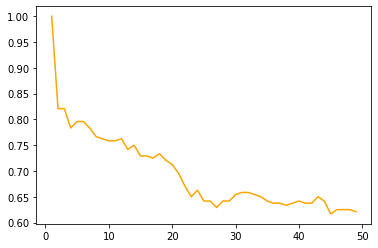

In [ ]:
v = []
k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    k_pred = knn.predict(X)
    v.append( metrics.accuracy_score(y, k_pred))

plt.pyplot.plot(k_range,v,c='Orange',)
plt.pyplot.show()

In [ ]:
logreg = LogisticRegression()
logreg.fit(X, y)
logreg.predict([[3, 5, 4, 2]])
y_pred = logreg.predict(X)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 5, 0, 8, 8,
       0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 0])

In [ ]:
print(metrics.accuracy_score(y, kypred))
print(metrics.accuracy_score(y, y_pred))

0.7958333333333333
0.3375


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print(X_train.shape)
print(y_train.shape)

(144, 4)
(144,)


In [ ]:
logres = LogisticRegression()
logres.fit(X_train,y_train)

log_pred = logres.predict(X_test)

mt.accuracy_score(log_pred,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.2604166666666667

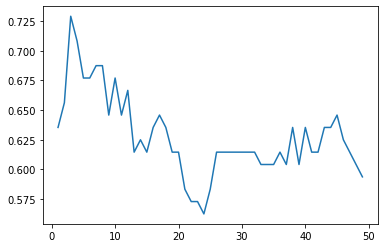

In [ ]:
v=[]
k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    v.append( metrics.accuracy_score(y_test, k_pred))



import matplotlib.pyplot as plt
plt.plot(k_range,v)

plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_train, y_train)
k_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, k_pred)

0.6666666666666666

#5. Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab3.